# EXTRACTION DES DONNEES

In [76]:
#Import des bibliothèques
import glob
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
#Adresse du dossier contenant les fichiers et on les stocke dans files
directory ='/Users/emilienbonhomme/Desktop/DataScientest - Projet Blood Cell/PBC_dataset_normal_DIB/*'
files=glob.glob(directory +'//*.jpg')
print(files[0])

/Users/emilienbonhomme/Desktop/DataScientest - Projet Blood Cell/PBC_dataset_normal_DIB/basophil/BA_689200.jpg


In [78]:
#Recupération des informations présentes dans l'adresse de chaque fichiers (type, clé, nom et extension)
df_infos = pd.DataFrame({'address_file':files})
df_infos['type'] = df_infos['address_file'].apply(lambda x: x.split('/')[-2])
df_infos['key'] = df_infos['address_file'].apply(lambda x: x.split('/')[-1].split('_')[0])
df_infos['name'] = df_infos['address_file'].apply(lambda x: x.split('/')[-1].split('.')[0])
df_infos['ext'] = df_infos['address_file'].apply(lambda x: x.split('.')[-1])

df_infos.head(5)

,address_file,type,key,name,ext
0,/Users/emilienbonhomme/Desktop/DataScientest -...,basophil,BA,BA_689200,jpg
1,/Users/emilienbonhomme/Desktop/DataScientest -...,basophil,BA,BA_883452,jpg
2,/Users/emilienbonhomme/Desktop/DataScientest -...,basophil,BA,BA_382161,jpg
3,/Users/emilienbonhomme/Desktop/DataScientest -...,basophil,BA,BA_175579,jpg
4,/Users/emilienbonhomme/Desktop/DataScientest -...,basophil,BA,BA_775722,jpg


In [79]:
# Récupération des dimensions de chaque image
dimensions, dim_w, dim_h = [],[],[]

# Pour chaque image dans la liste de fichier, on recupere les dimensions
for i in df_infos['address_file']:
    img = cv2.imread(i, cv2.IMREAD_COLOR)
    w, h = img.shape[:2]   #on récupere uniquement les deux premieres valeurs dans w et h
    dimensions.append(img.shape[:2])
    dim_w.append(w)
    dim_h.append(h)

# On ajoute les données de dimensions au dataframe df_infos
df_infos = pd.concat([df_infos,pd.DataFrame({'dimensions':dimensions ,'dim_w':dim_w,'dim_h':dim_h})],axis=1)

In [80]:
df_infos.head(5)

,address_file,type,key,name,ext,dimensions,dim_w,dim_h
0,/Users/emilienbonhomme/Desktop/DataScientest -...,basophil,BA,BA_689200,jpg,"(363, 360)",363,360
1,/Users/emilienbonhomme/Desktop/DataScientest -...,basophil,BA,BA_883452,jpg,"(363, 360)",363,360
2,/Users/emilienbonhomme/Desktop/DataScientest -...,basophil,BA,BA_382161,jpg,"(369, 366)",369,366
3,/Users/emilienbonhomme/Desktop/DataScientest -...,basophil,BA,BA_175579,jpg,"(363, 360)",363,360
4,/Users/emilienbonhomme/Desktop/DataScientest -...,basophil,BA,BA_775722,jpg,"(363, 360)",363,360


In [81]:
#Nombres d'images par types de cellules
df_infos['type'].value_counts()

neutrophil      3329
eosinophil      3117
ig              2895
platelet        2348
erythroblast    1551
monocyte        1420
basophil        1218
lymphocyte      1214
Name: type, dtype: int64

In [82]:
# Répartition des différents types de cellules en pourcentage (%)
df_infos['type'].value_counts(normalize=True).round(4)*100

neutrophil      19.48
eosinophil      18.24
ig              16.94
platelet        13.74
erythroblast     9.07
monocyte         8.31
basophil         7.13
lymphocyte       7.10
Name: type, dtype: float64

In [83]:
#Nombres d'images par clés de cellules
df_infos['key'].value_counts()

EO            3117
PLATELET      2348
SNE           1646
BNE           1633
ERB           1551
MO            1420
BA            1218
LY            1214
MY            1137
MMY           1015
PMY            592
IG             151
NEUTROPHIL      50
Name: key, dtype: int64

In [84]:
# Répartition des différents clés de cellules en pourcentage (%)
df_infos['key'].value_counts(normalize=True).round(4)*100

EO            18.24
PLATELET      13.74
SNE            9.63
BNE            9.55
ERB            9.07
MO             8.31
BA             7.13
LY             7.10
MY             6.65
MMY            5.94
PMY            3.46
IG             0.88
NEUTROPHIL     0.29
Name: key, dtype: float64

In [85]:
#Nombres d'images par résolution
df_infos['dimensions'].value_counts()

(363, 360)    16639
(369, 366)      250
(360, 360)      198
(361, 360)        2
(360, 362)        1
(360, 361)        1
(360, 359)        1
Name: dimensions, dtype: int64

In [86]:
#Nombres d'images par par type et par clés de cellules 
df_infos.groupby(['type','key']).agg({'address_file':'count'}).rename(columns={'address_file':'total'})

total
type         key              
basophil     BA           1218
eosinophil   EO           3117
erythroblast ERB          1551
ig           IG            151
             MMY          1015
             MY           1137
             PMY           592
lymphocyte   LY           1214
monocyte     MO           1420
neutrophil   BNE          1633
             NEUTROPHIL     50
             SNE          1646
platelet     PLATELET     2348

In [87]:
df_infos.to_csv('/Users/emilienbonhomme/Desktop/DataScientest - Projet Blood Cell/img_info.csv',index=False)

# DATAVIZ

In [105]:
#Pour chaque dossier, on recupere une image et on la stocke 
img_random = []
for t in df_infos['type'].value_counts().index: # pour chaque type de cellule 
    list_index = df_infos[df_infos['type'] == t].index   # On récupere l'index des entrées du type de cellule
    img = np.random.choice(list_index) # on choisit au hasard l'un des index
    img_random.append(img) # et on l'ajoute à la liste image_random

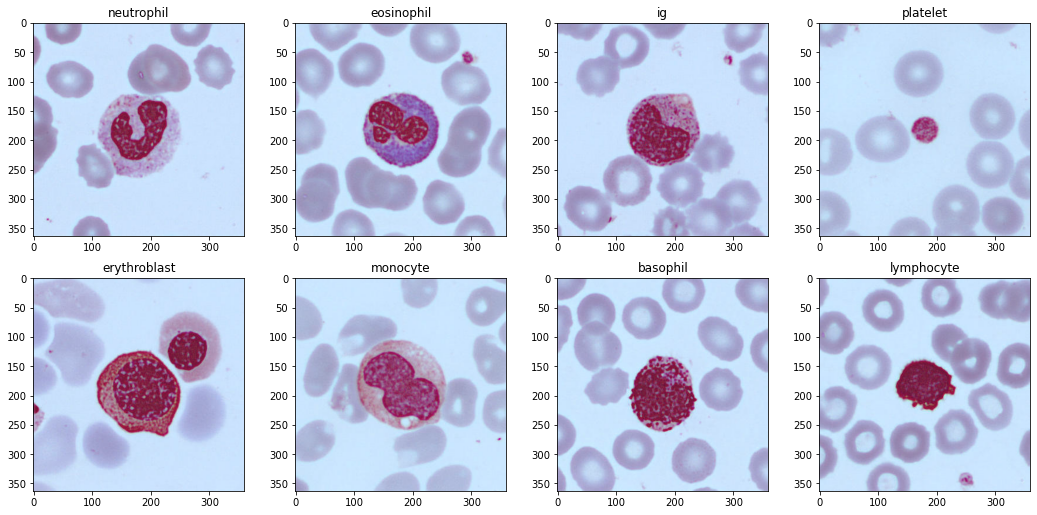

In [106]:
#Affichage des images (RGB)
figure = plt.figure(figsize=(18,18)) 
index_tmp = 1
for i in img_random:     # pour chaque index dans la liste
    filename = df_infos.loc[i,'address_file']     # On récupere le l'adresse de l'image 
    img = cv2.imread(filename, cv2.IMREAD_COLOR)   # on lit l'image
    plt.subplot(4,4,index_tmp)
    plt.title(df_infos.loc[i,'type'])
    plt.imshow(img)
    index_tmp+=1


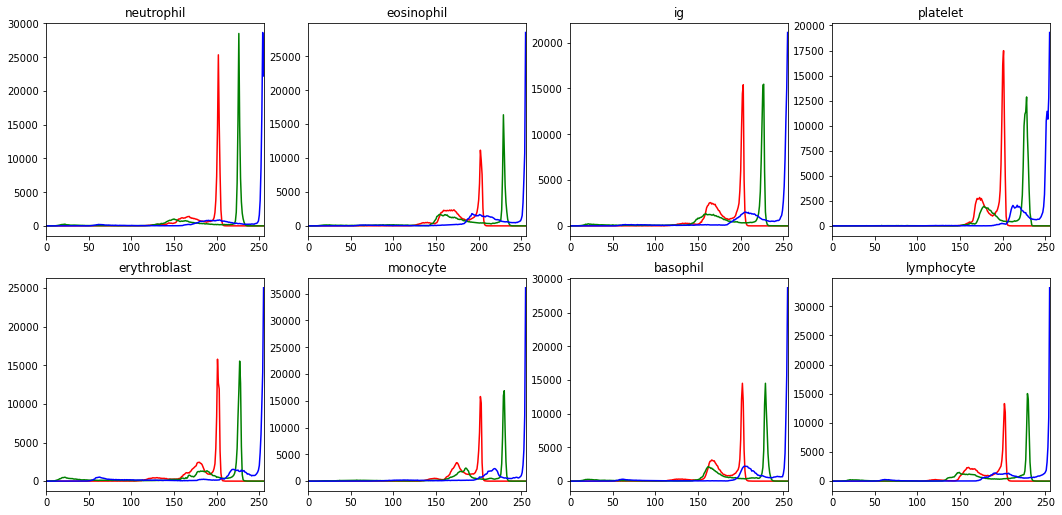

In [107]:
# Affichage de la balance des couleurs
figure = plt.figure(figsize = (18,18)) 
index_tmp = 1
for i in img_random:
    filename = df_infos.loc[i,'address_file']
    img = cv2.imread(filename, cv2.IMREAD_COLOR)
    plt.subplot(4,4,index_tmp)
    for c ,col in enumerate(['r', 'g', 'b']):
        color_hist = cv2.calcHist([img],[c],None,[256],[0,256])
        plt.plot(color_hist, color = col)
        plt.title(df_infos.loc[i,'type'])
        plt.xlim([0,256])
    index_tmp+=1


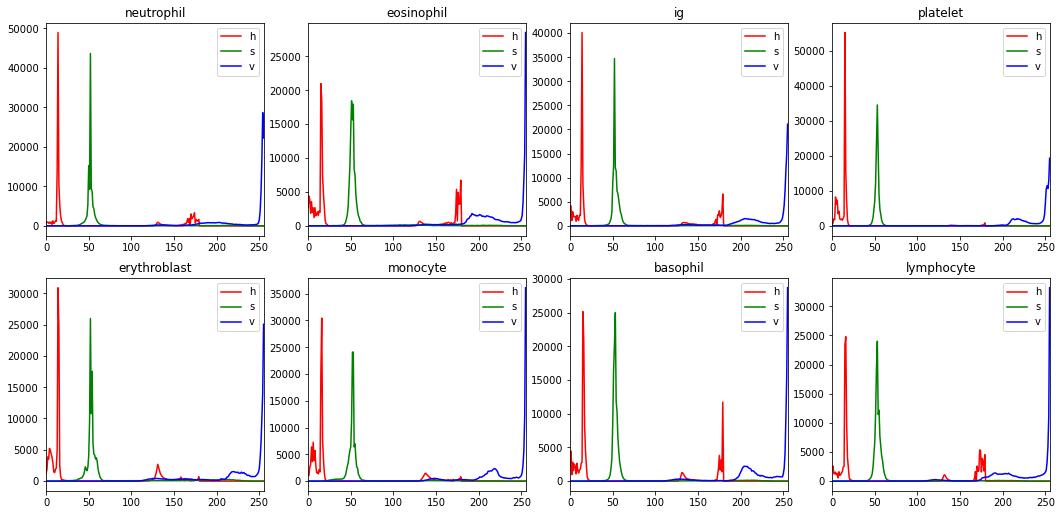

In [108]:
#Transformation de l'image de RGB -> HSV.
figure = plt.figure(figsize = (18,18)) 
index_tmp = 1
for i in img_random:
    filename = df_infos.loc[i,'address_file']
    img = cv2.imread(filename, cv2.IMREAD_COLOR)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    color = ('r','g','b')
    labels = ('h','s','v')
    plt.subplot(4,4,index_tmp)
    for c ,col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([hsv],[c],None,[256],[0,256])
        plt.plot(hist, color = col,label=labels[c])
        plt.title(df_infos.loc[i,'type'])
        plt.legend()
        plt.xlim([0,256])
    index_tmp+=1

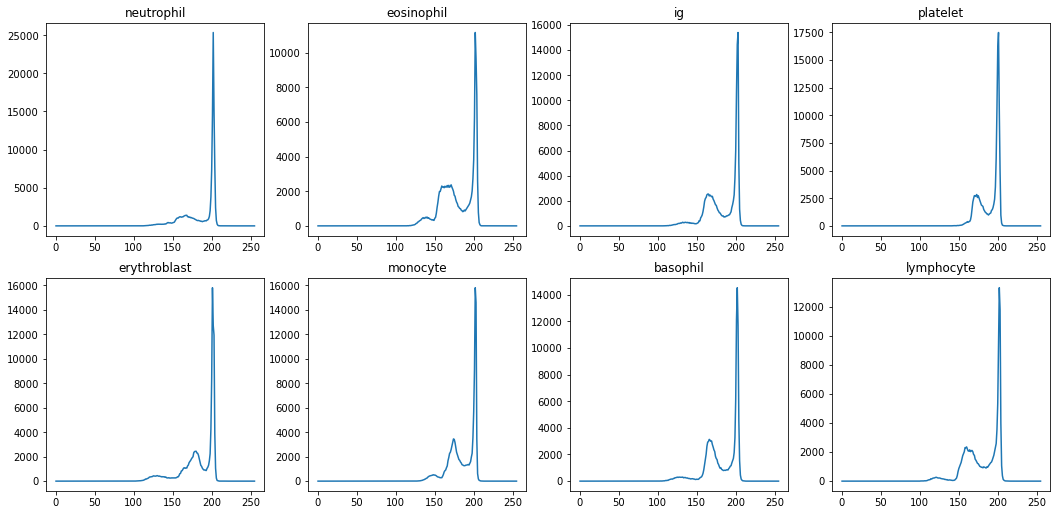

In [109]:
# Affichage de la balance des blancs
figure = plt.figure(figsize = (18,18)) 
index_tmp = 1
for i in img_random:
    filename = df_infos.loc[i,'address_file']
    img_gray = cv2.imread(filename, cv2.COLOR_BGR2GRAY)
    white_hist = cv2.calcHist([img_gray],[0],None,[256],[0,256])
    plt.subplot(4,4,index_tmp)
    plt.plot(white_hist)
    plt.title(df_infos.loc[i,'type']);
    index_tmp+=1
   

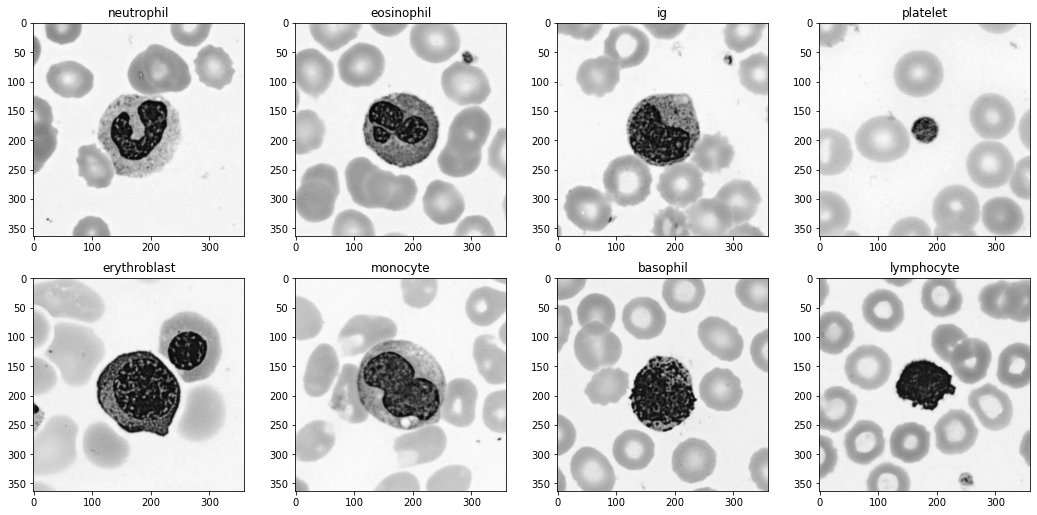

In [110]:
#Affichage des images (Gray)
figure = plt.figure(figsize=(18,18)) 
index_tmp = 1
for i in img_random:     # pour chaque index dans la liste
    filename = df_infos.loc[i,'address_file']     # On récupere le l'adresse de l'image 
    img_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)   # on lit l'image
    plt.subplot(4,4,index_tmp)
    plt.title(df_infos.loc[i,'type'])
    plt.imshow(img_gray, 'gray')
    index_tmp+=1

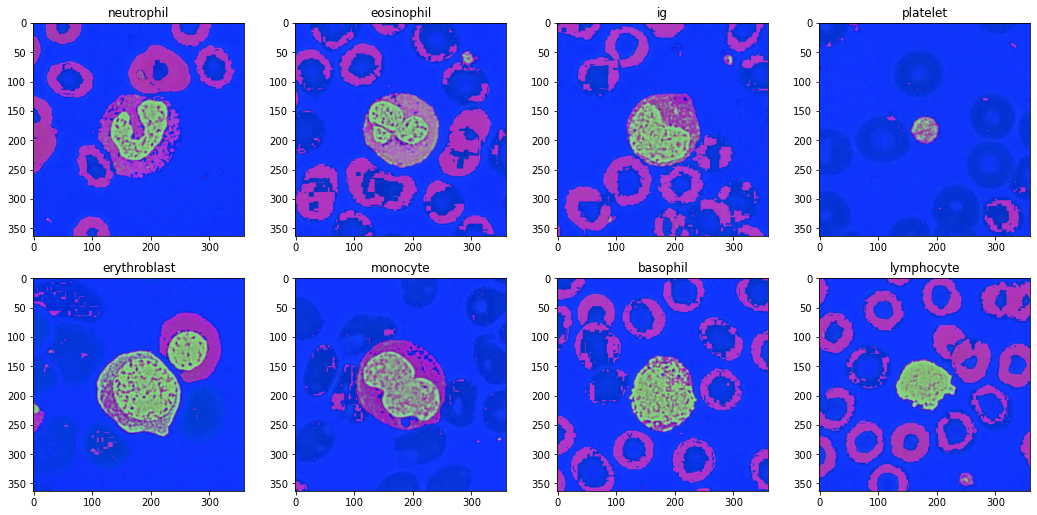

In [111]:
# Affichage des images en HSV
figure = plt.figure(figsize=(18,18)) 
index_tmp = 1
for i in img_random:
    filename = df_infos.loc[i,'address_file']
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    plt.subplot(4,4,index_tmp)
    plt.imshow(img, cmap= 'gray')
    plt.title(df_infos.loc[i,'type'])
    index_tmp+=1

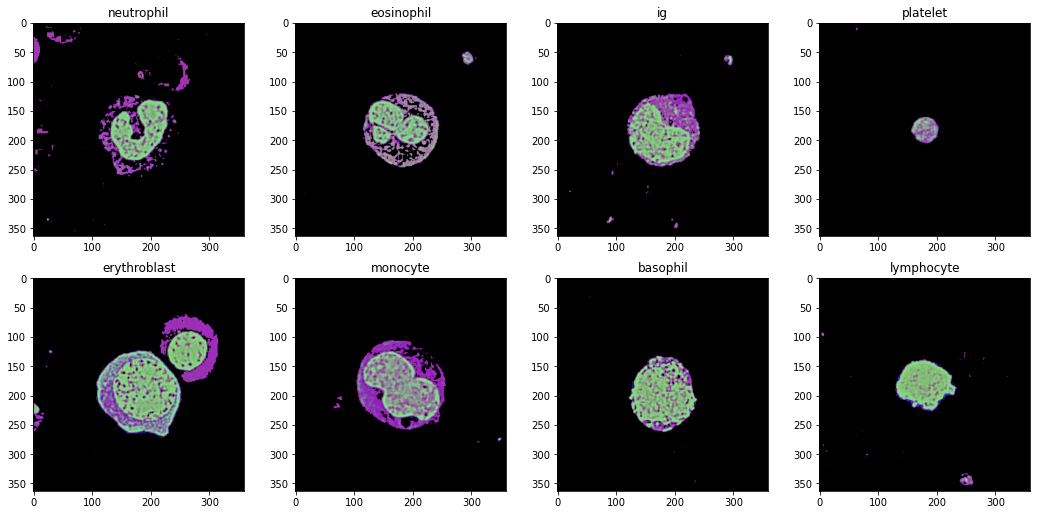

In [112]:
# Affichage ds image par une segmentation par couleur
figure = plt.figure(figsize=(18,18)) 
index_tmp = 1
for i in img_random:
    filename = df_infos.loc[i,'address_file']
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_color = np.array([30, 0, 0])
    upper_color = np.array([165,255,255])
    mask_color = cv2.inRange(img, lower_color, upper_color)
    res_red = cv2.bitwise_and(img,img, mask= mask_color)
    plt.subplot(4,4,index_tmp)
    plt.imshow(res_red);
    plt.title(df_infos.loc[i,'type'])
    index_tmp+=1

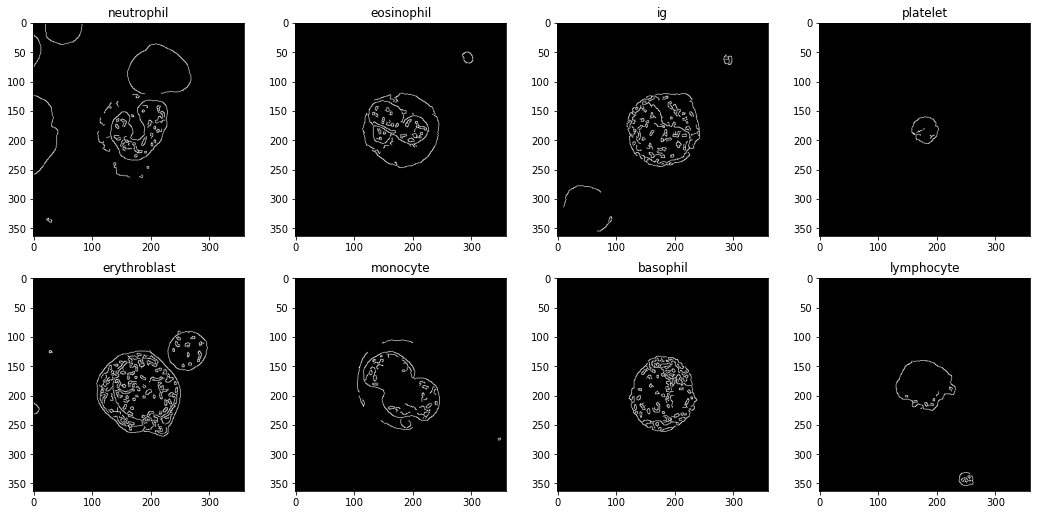

In [113]:
# Affichage des images avec Canny
figure = plt.figure(figsize=(18,18)) 
index_tmp = 1
for i in img_random:
    filename = df_infos.loc[i,'address_file']
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    filtre = cv2.GaussianBlur(img,(3,3),1)
    edges = cv2.Canny(filtre,125,250)
    plt.subplot(4,4,index_tmp)
    plt.imshow(edges, cmap = 'gray')
    plt.title(df_infos.loc[i,'type'])
    index_tmp+=1